# Попытка решить задачу через OpenCV (неудачная)

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
img = cv2.imread('data/min_of_nature/images/DJI_0079.JPG')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [7]:
def show_img(img):
    plt.figure(figsize=(16, 9))
    plt.imshow(img)

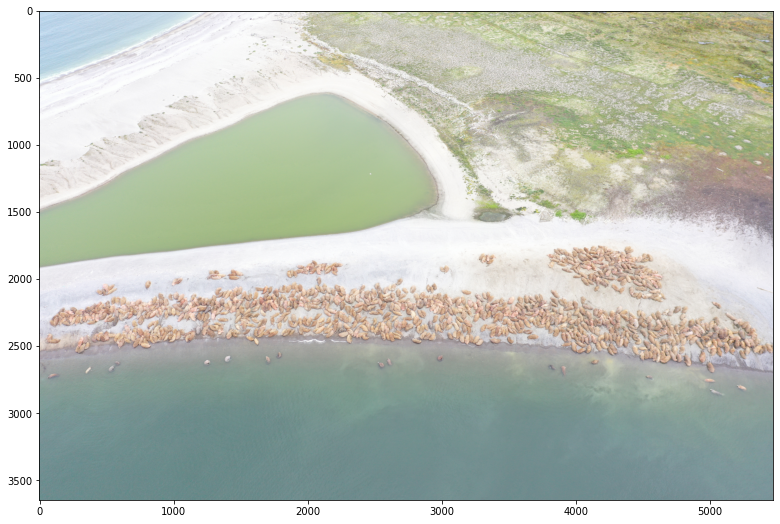

In [8]:
show_img(img)

In [5]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_OTSU)

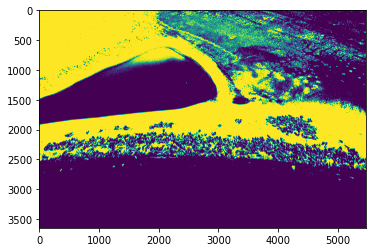

In [6]:
plt.imshow(thresh)

In [9]:
# noise removal
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations = 2)
# sure background area
sure_bg = cv2.dilate(opening, kernel,iterations=3)
# Finding sure foreground area
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform, 0.1 * dist_transform.max(), 255, 0)
# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)

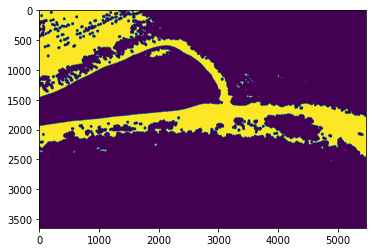

In [10]:
plt.imshow(sure_fg)

In [11]:
# Marker labelling
ret, markers = cv2.connectedComponents(sure_fg)
# Add one to all labels so that sure background is not 0, but 1
markers = markers+1
# Now, mark the region of unknown with zero
markers[unknown==255] = 0

In [12]:
markers = cv2.watershed(img,markers)
img[markers == -1] = [255,0,0]

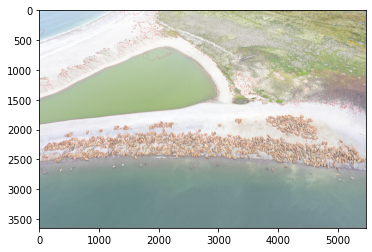

In [13]:
plt.imshow(img)